In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)
from sklearn.model_selection import GridSearchCV

In [2]:
# Load data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')  # 0=malignant, 1=benign

print(f"Shape: {X.shape}")
print(f"Class distribution:\n{y.value_counts()}")

Shape: (569, 30)
Class distribution:
target
1    357
0    212
Name: count, dtype: int64


In [5]:
# Preview features
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


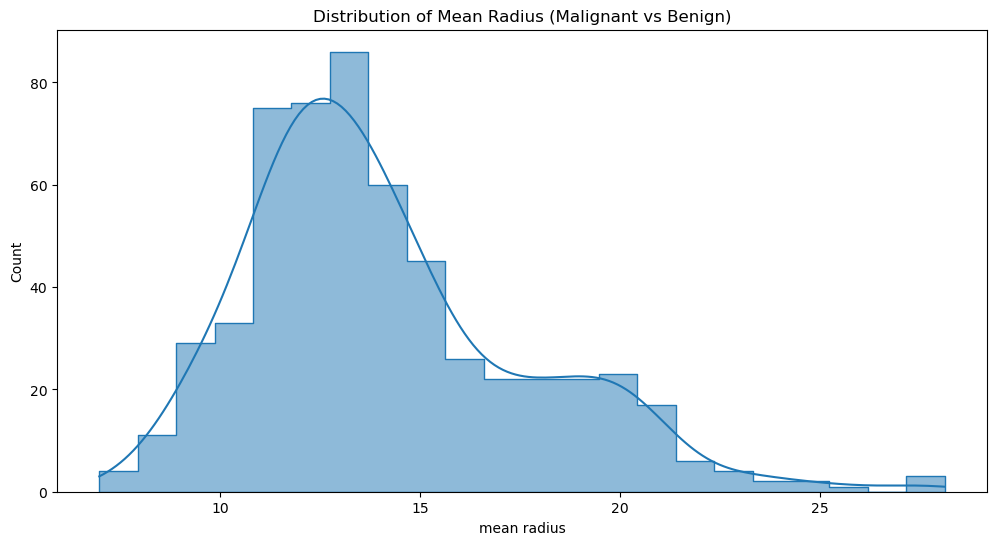

In [4]:
# Feature Distributions
plt.figure(figsize=(12, 6))
sns.histplot(X['mean radius'], kde=True, element='step')
plt.title("Distribution of Mean Radius (Malignant vs Benign)")
plt.show()

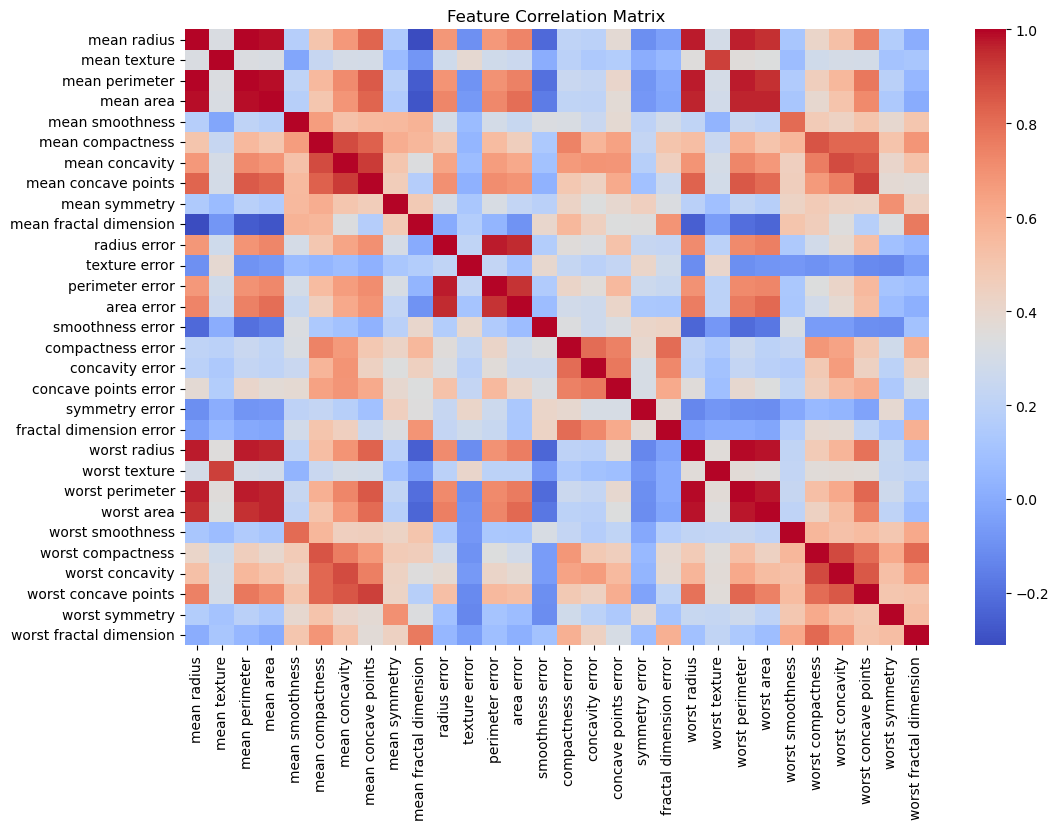

In [6]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = X.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

In [7]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Train model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [12]:
# Prediction
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC curve

In [14]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791
ROC AUC: 0.99737962659679


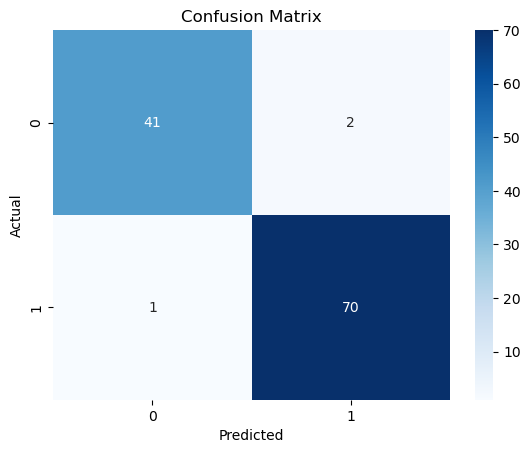

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

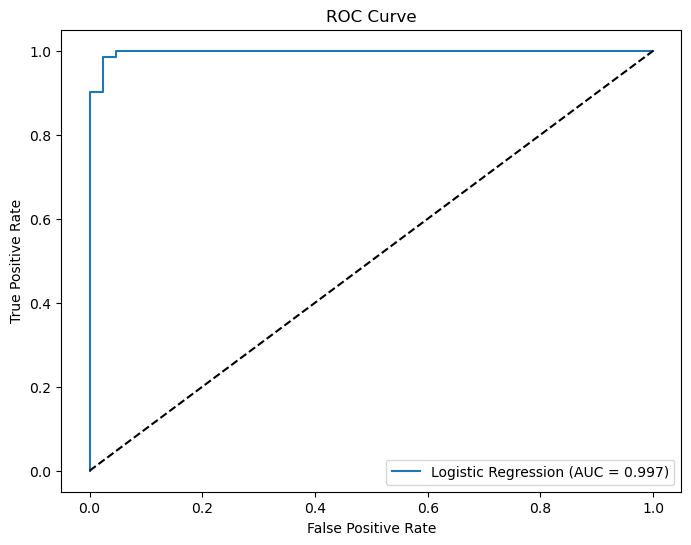

In [16]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [17]:
# Feature Importance
coef_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': logreg.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("Top 5 Features Influencing Malignancy:")
print(coef_df.head())

Top 5 Features Influencing Malignancy:
                    Feature  Coefficient
15        compactness error     0.682491
19  fractal dimension error     0.616230
5          mean compactness     0.540164
18           symmetry error     0.500425
8             mean symmetry     0.236119


In [18]:
# Odds Ratio
coef_df['Odds_Ratio'] = np.exp(coef_df['Coefficient'])
print(coef_df.sort_values('Odds_Ratio', ascending=False).head())

                    Feature  Coefficient  Odds_Ratio
15        compactness error     0.682491    1.978802
19  fractal dimension error     0.616230    1.851933
5          mean compactness     0.540164    1.716288
18           symmetry error     0.500425    1.649422
8             mean symmetry     0.236119    1.266324


In [20]:
# Hyperparameter Tuning (Regularization)
params = {'C': np.logspace(-3, 3, 100)}  # Test C values from 0.001 to 1000
logreg_cv = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5, scoring='roc_auc')
logreg_cv.fit(X_train_scaled, y_train)

print("Best C:", logreg_cv.best_params_['C'])  # e.g., C=0.1

Best C: 0.049770235643321115


In [21]:
# L1 vs L2 Regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
logreg_l1.fit(X_train_scaled, y_train)

print("L1 Coefficients (Sparse):")
print(pd.Series(logreg_l1.coef_[0], index=data.feature_names).sort_values(ascending=False))

L1 Coefficients (Sparse):
mean radius                0.000000
perimeter error            0.000000
worst compactness          0.000000
worst area                 0.000000
worst perimeter            0.000000
fractal dimension error    0.000000
symmetry error             0.000000
concave points error       0.000000
concavity error            0.000000
mean texture               0.000000
smoothness error           0.000000
area error                 0.000000
compactness error          0.000000
texture error              0.000000
mean compactness           0.000000
mean perimeter             0.000000
mean area                  0.000000
mean smoothness            0.000000
worst fractal dimension    0.000000
mean concavity             0.000000
mean symmetry              0.000000
mean fractal dimension     0.000000
worst concavity           -0.073800
worst smoothness          -0.176429
radius error              -0.214237
worst symmetry            -0.244351
worst concave points      -0.441764
wo

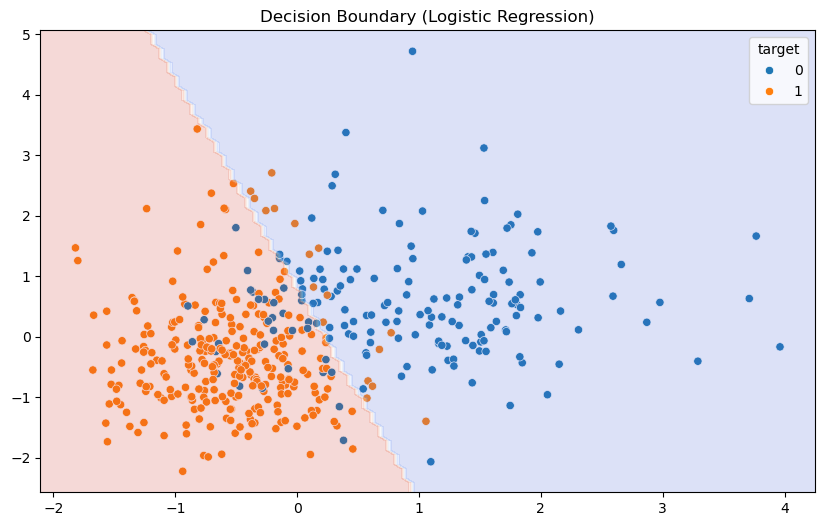

In [22]:
# Model Interpretation: Decision Boundary
X_2d = X_train_scaled[:, :2]  # First 2 features
logreg_2d = LogisticRegression().fit(X_2d, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y_train)
ax = plt.gca()
xlim, ylim = ax.get_xlim(), ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, 100), np.linspace(*ylim, 100))
Z = logreg_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.title("Decision Boundary (Logistic Regression)")
plt.show()